### Tutorial3 Question 4
-----

Programming Problem: For this task we will use the Iris dataset again to familiarize
yourself with the use of the svm library in sklearn.

(a) Load the Iris dataset and split the data into its training and test set.

In [5]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as pl
from sklearn import svm
from sklearn.model_selection import train_test_split as spliter
from sklearn import datasets as dataset

In [6]:
iris = dataset.load_iris(return_X_y = True)
#predictors_train, predictors_test = iris[0][0:40,:], iris[0][100:150,:]
#dependent_train, dependent_test = iris[1][0:100], iris[1][100:150]
# Split the Data set into traning data and testing data

#Should have used the train_test_split function from sklearn!!!!!!!!!

predictors_train = np.vstack((np.vstack((iris[0][0:40,:], iris[0][50:90,:])),iris[0][100:140,:]))
predictors_test = np.vstack((np.vstack((iris[0][40:50,:], iris[0][90:100,:])),iris[0][140:150,:]))
dependent_train = np.concatenate((np.concatenate((iris[1][0:40], iris[1][50:90]), axis=0),iris[1][100:140]),axis=0)
dependent_test = np.concatenate((np.concatenate((iris[1][40:50], iris[1][90:100]), axis=0),iris[1][140:150]),axis=0)

(b) Train and test a SVM classifier using the default SVC and check the default setting of SVC (e.g., which kernel does it use? what is the C parameter set to and what does it represent? Hint: you may find  [svm][skweblink] useful.
* C parameter default to 1, it represents the soft margin SVM's error penalty constant.
* The kernel it uses is the Gaussian RBF.
[skweblink]:http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html


In [7]:
svc = svm.SVC()
svc.fit(predictors_train, dependent_train)
predict_test = svc.predict(predictors_test)
print("Error rate is: " + str((1-np.sum(predict_test==dependent_test)/predictors_test.shape[0])*100) + "%.")
print("SVC score is: " + str(svc.score(predictors_test, dependent_test)) +".")

Error rate is: 0.0%.
SVC score is: 1.0.


(c) How many support vectors does the model have? SVM only utilizes support vectors in prediction. Why is it important in terms of memory efficiency?
* We have 42 support vectors.
* In terms of memory efficiency, the non_support_vectors are not needed for building the target hyperplane in seperating the data sets. If we have very large data sets, we can choose to build the hyperplane incrementally so that we only memorise the set of support vectors.

In [8]:
support_vectors = svc.support_vectors_
print("Support vectos number is: " + str(support_vectors.shape[0]) + " out of 120 traning data rows.")

Support vectos number is: 42 out of 120 traning data rows.


(d) Let’s use the two features of ‘sepal length’ and ‘sepal width’ to visualize the boundary of SVM. Train the SVM model with the radial basis function (rbf) kernel using the two features, and then visualize the boundary in a 2D plot. Repeat the same analysis using an SVM that uses a linear kernel.

In [13]:
def visualization_kernel_2d_plot (feature_1, feature_2, dependent, kernel):
        
    N = dependent.shape[0]
    predictors_feature = np.stack((feature_1, feature_2), axis=1)
    
    slf = svm.SVC(kernel = kernel)
    slf.fit(predictors_feature, dependent)
    pl.scatter(feature_1, feature_2, dependent, c = dependent)
    w = slf.coef_
    
    g1 = lambda x: w[0][0] * x + w[0][1]
    g2 = lambda x: w[1][0] * x + w[1][0]
    g3 = lambda x: w[2][0] * x + w[2][0]
    x = np.linspace(5,8)
    #pl.plot(x,g1(x))
    #pl.plot(x,g2(x))
    #pl.plot(x,g3(x))
    pl.show()
    

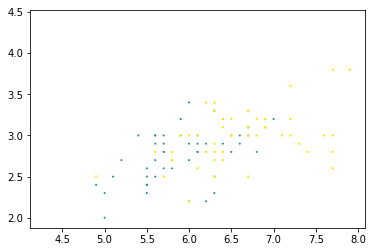

In [14]:
visualization_kernel_2d_plot (feature_1=iris[0][:,0], feature_2=iris[0][:,1], dependent=iris[1], kernel='linear')

In [8]:
print(dataset.load_iris()['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  